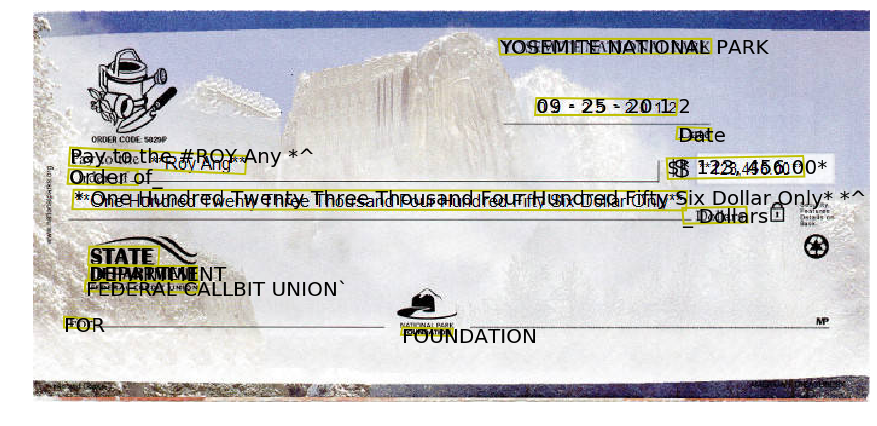

In [54]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<key here>"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://eastus2.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://generalstoragevis.blob.core.windows.net/ocr/3.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    results = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in results:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")


In [55]:
for result in results:
    print (result[1])
    
print(results)

YOSEMITE NATIONAL PARK
09 - 25 - 20 1 2
Date
Pay to the #ROY Any *^
Order of_
$* 123, 456.00*
* One Hundred Twenty Three Thousand Four Hundred Fifty Six Dollar Only* *^
_ Dollars
STATE
DEPARTMENT
FEDERAL CALLBIT UNION`
FOR
FOUNDATION
[([385, 23, 561, 23, 561, 35, 386, 36], 'YOSEMITE NATIONAL PARK'), ([416, 72, 533, 73, 532, 86, 415, 86], '09 - 25 - 20 1 2'), ([533, 96, 561, 97, 561, 107, 532, 106], 'Date'), ([30, 113, 176, 120, 175, 135, 29, 128], 'Pay to the #ROY Any *^'), ([29, 131, 86, 132, 86, 144, 28, 143], 'Order of_'), ([524, 122, 637, 120, 638, 137, 525, 139], '$* 123, 456.00*'), ([33, 148, 541, 149, 540, 165, 32, 164], '* One Hundred Twenty Three Thousand Four Hundred Fifty Six Dollar Only* *^'), ([537, 163, 590, 162, 591, 175, 538, 176], '_ Dollars'), ([46, 195, 104, 195, 103, 211, 45, 210], 'STATE'), ([46, 211, 135, 211, 135, 224, 45, 223], 'DEPARTMENT'), ([43, 223, 137, 224, 136, 233, 42, 232], 'FEDERAL CALLBIT UNION`'), ([25, 253, 50, 255, 50, 263, 25, 262], 'FOR'), ([305,

In [56]:
# Replace <Subscription Key> with your valid subscription key.
text_analytics_subscription_key = "<key here>"
assert text_analytics_subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
text_analytics_base_url = "https://westus2.api.cognitive.microsoft.com/text/analytics/v2.1-preview/"

text_analytics_url = text_analytics_base_url + "entities"

headers = {'Ocp-Apim-Subscription-Key': text_analytics_subscription_key}
documents = []
for index, result in enumerate(results, start=1):
    document = {"language":"en", "id":str(index), "text":result[1]}
    documents.append(document)

#document = {"language":"en", "id":"1", "text":"$123,456,789.00"}
#documents.append(document)
    
data = {"documents":documents}
print(data)


response = requests.post(text_analytics_url, headers=headers, json=data)
entities = response.json()
print('')
print(entities)

{'documents': [{'language': 'en', 'id': '1', 'text': 'YOSEMITE NATIONAL PARK'}, {'language': 'en', 'id': '2', 'text': '09 - 25 - 20 1 2'}, {'language': 'en', 'id': '3', 'text': 'Date'}, {'language': 'en', 'id': '4', 'text': 'Pay to the #ROY Any *^'}, {'language': 'en', 'id': '5', 'text': 'Order of_'}, {'language': 'en', 'id': '6', 'text': '$* 123, 456.00*'}, {'language': 'en', 'id': '7', 'text': '* One Hundred Twenty Three Thousand Four Hundred Fifty Six Dollar Only* *^'}, {'language': 'en', 'id': '8', 'text': '_ Dollars'}, {'language': 'en', 'id': '9', 'text': 'STATE'}, {'language': 'en', 'id': '10', 'text': 'DEPARTMENT'}, {'language': 'en', 'id': '11', 'text': 'FEDERAL CALLBIT UNION`'}, {'language': 'en', 'id': '12', 'text': 'FOR'}, {'language': 'en', 'id': '13', 'text': 'FOUNDATION'}]}

{'documents': [{'id': '1', 'entities': [{'name': 'Yosemite National Park', 'matches': [{'text': 'YOSEMITE NATIONAL PARK', 'offset': 0, 'length': 22}], 'wikipediaLanguage': 'en', 'wikipediaId': 'Yosem